# Major Project
## Group 8 (work with 4 members)

### 1. Import and explore the data.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Command to tell Python to actually display the graphs
%matplotlib inline 
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import joblib

### Import dataset

**Import Data:**
  * Load sensor-data.csv (1567 samples, 591 features + 1 target column).

In [2]:
# Load the data
df = pd.read_csv('signal-data.csv')

### 2. Data cleansing:ions

**• Missing value treatment**
   
    Initial Exploration:
    1. Check data types, missing values, and basic statistics.
    2. Review target distribution: -1 = pass, 1 = fail.
    3. Identify features/rows with excessive missingness; impute or drop as justified.

**• Drop attribute/s if required using relevant functional knowledge.**
    
    1.Remove features with constant values or irrelevant identifiers using domain knowledge.

**• Make all relevant modifications on the data using both functional/logical
reasoning/assumptions**

 1. Ensure all features are numeric. 2. 
Convert target column to binary (0/1) for modeling if needed

In [3]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,7/19/2008 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,7/19/2008 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,7/19/2008 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,7/19/2008 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,7/19/2008 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
df.tail()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
1562,10/16/2008 15:13,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,10/16/2008 20:49,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,10/17/2008 5:26,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,10/17/2008 6:01,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1
1566,10/17/2008 6:07,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,NaN,...,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844,-1


In [5]:
df.head(len(df))

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,7/19/2008 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,7/19/2008 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,7/19/2008 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,7/19/2008 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,7/19/2008 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,10/16/2008 15:13,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,10/16/2008 20:49,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,10/17/2008 5:26,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,10/17/2008 6:01,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [7]:
df.shape

(1567, 592)

In [8]:
df.size

927664

In [9]:
df.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [11]:
df.isnull()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1563,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1564,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# check missing values in variables
print("Missing values per column:\n\n", df.isnull().sum())

Missing values per column:

 Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64


In [13]:
print('Total missing value: ',df.isnull().sum().sum())

Total missing value:  41951


In [14]:
df.isna()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1563,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1564,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isna().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [16]:
df.isna().sum().sum()

41951

In [17]:
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

In [18]:
df['Time'].value_counts(dropna=False)

Time
NaN    1567
Name: count, dtype: int64

In [19]:
# Drop columns with >50% missing values
threshold = 0.5 * df.shape[0]
threshold

783.5

In [20]:
threshold = 0.5 * df.shape[0]
df = df.loc[:, df.isnull().sum() < threshold]
df

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [21]:
# Impute remaining missing values with median

data = pd.DataFrame(df)
imputer = SimpleImputer(strategy='median')
imputer.fit(data)
data_t = imputer.transform(data)
data_imputed = pd.DataFrame(data_t,columns=data.columns)
data_imputed

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1.0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1.0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4616,-0.0013,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1.0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1.0


In [22]:
# Drop constant columns (zero variance)
nunique = data_imputed.nunique()
constant_cols = nunique[nunique == 1].index
data_imputed.drop(columns=constant_cols, inplace=True)
data_imputed

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1.0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1.0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.4616,-0.0013,0.0004,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1.0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1.0


In [23]:
# Ensure target is integer and named 'target'
data_imputed.rename(columns={data_imputed.columns[-1]: 'target'}, inplace=True)
data_imputed['target'] = data_imputed['target'].astype(int)


In [24]:
data_imputed

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,target
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.4616,-0.0013,0.0004,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [25]:
print(data_imputed.columns)

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10',
       ...
       '577', '582', '583', '584', '585', '586', '587', '588', '589',
       'target'],
      dtype='object', length=447)


In [26]:
print(data_imputed.dtypes)

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
586       float64
587       float64
588       float64
589       float64
target      int64
Length: 447, dtype: object


In [27]:
df.size

882221

### 3. Data analysis & visualisation:.

**• Perform detailed relevant statistical analysis on the data.**
      
      Statistical Analysis:
        1. Compute means, variances, and outlier detection.

**• Perform a detailed univariate, bivariate and multivariate analysis with appropriate
detailed comments after each analysis.**
     
     Univariate Analysis:
       1. Histograms, boxplots for feature distributions.
     Bivariate Analysis:
       1. Correlation heatmaps to identify redundancy.
       2. Compare feature distributions between pass/fail classes.
     Multivariate Analysis:
       1. PCA or t-SNE plots for dimensionality reduction and visualization.
       2. Comment on feature relationships and possible clusters.

In [28]:
# view summary statistics in numerical variables

print(round(data_imputed.describe(),2))

             0        1        2        3        4        6        7        8  \
count  1567.00  1567.00  1567.00  1567.00  1567.00  1567.00  1567.00  1567.00   
mean   3014.44  2495.87  2200.55  1395.38     4.17   101.12     0.12     1.46   
std      73.48    80.23    29.38   439.84    56.10     6.21     0.01     0.07   
min    2743.24  2158.75  2060.66     0.00     0.68    82.13     0.00     1.19   
25%    2966.66  2452.89  2181.10  1083.89     1.02    97.94     0.12     1.41   
50%    3011.49  2499.40  2201.07  1285.21     1.32   101.51     0.12     1.46   
75%    3056.54  2538.74  2218.06  1590.17     1.52   104.53     0.12     1.52   
max    3356.35  2846.44  2315.27  3715.04  1114.54   129.25     0.13     1.66   

             9       10  ...      577      582      583     584      585  \
count  1567.00  1567.00  ...  1567.00  1567.00  1567.00  1567.0  1567.00   
mean     -0.00     0.00  ...    16.64     0.50     0.02     0.0     3.07   
std       0.02     0.01  ...    12.49     

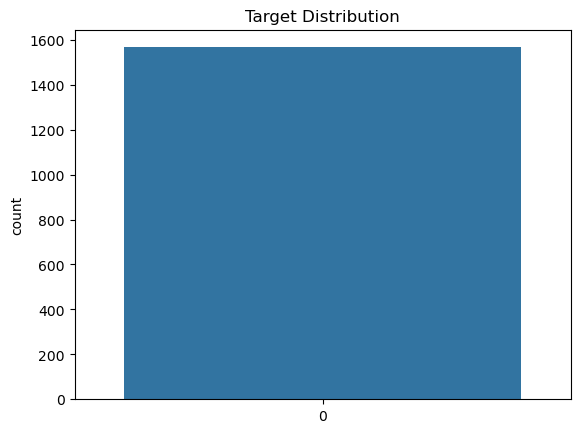

In [29]:
# Univariate: Target distribution
sns.countplot(data_imputed['target'])
plt.title('Target Distribution')
plt.show()

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Count'>

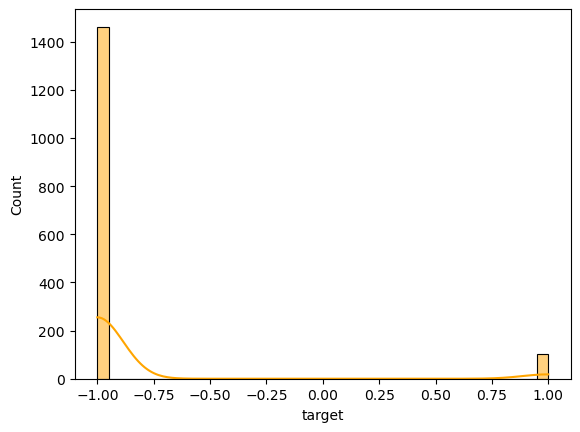

In [30]:
# Create a histogram of weight distribution for males with 20 bins
sns.histplot(data=data_imputed,x='target',bins=40,color='orange',kde=True)

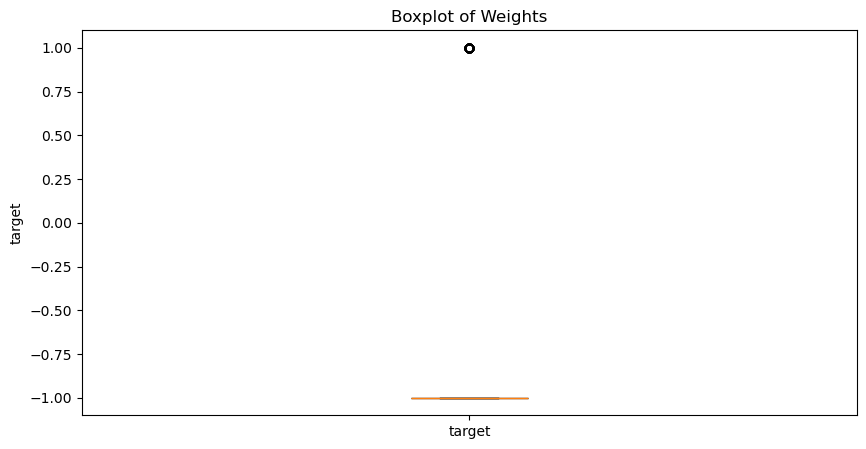

In [31]:
plt.figure(figsize=(10, 5))
plt.boxplot([data_imputed.loc[:, 'target']], 
           labels=['target'], 
           patch_artist=True,
           boxprops=dict(facecolor='green'))
plt.ylabel('target')
plt.title('Boxplot of Weights')
plt.show()

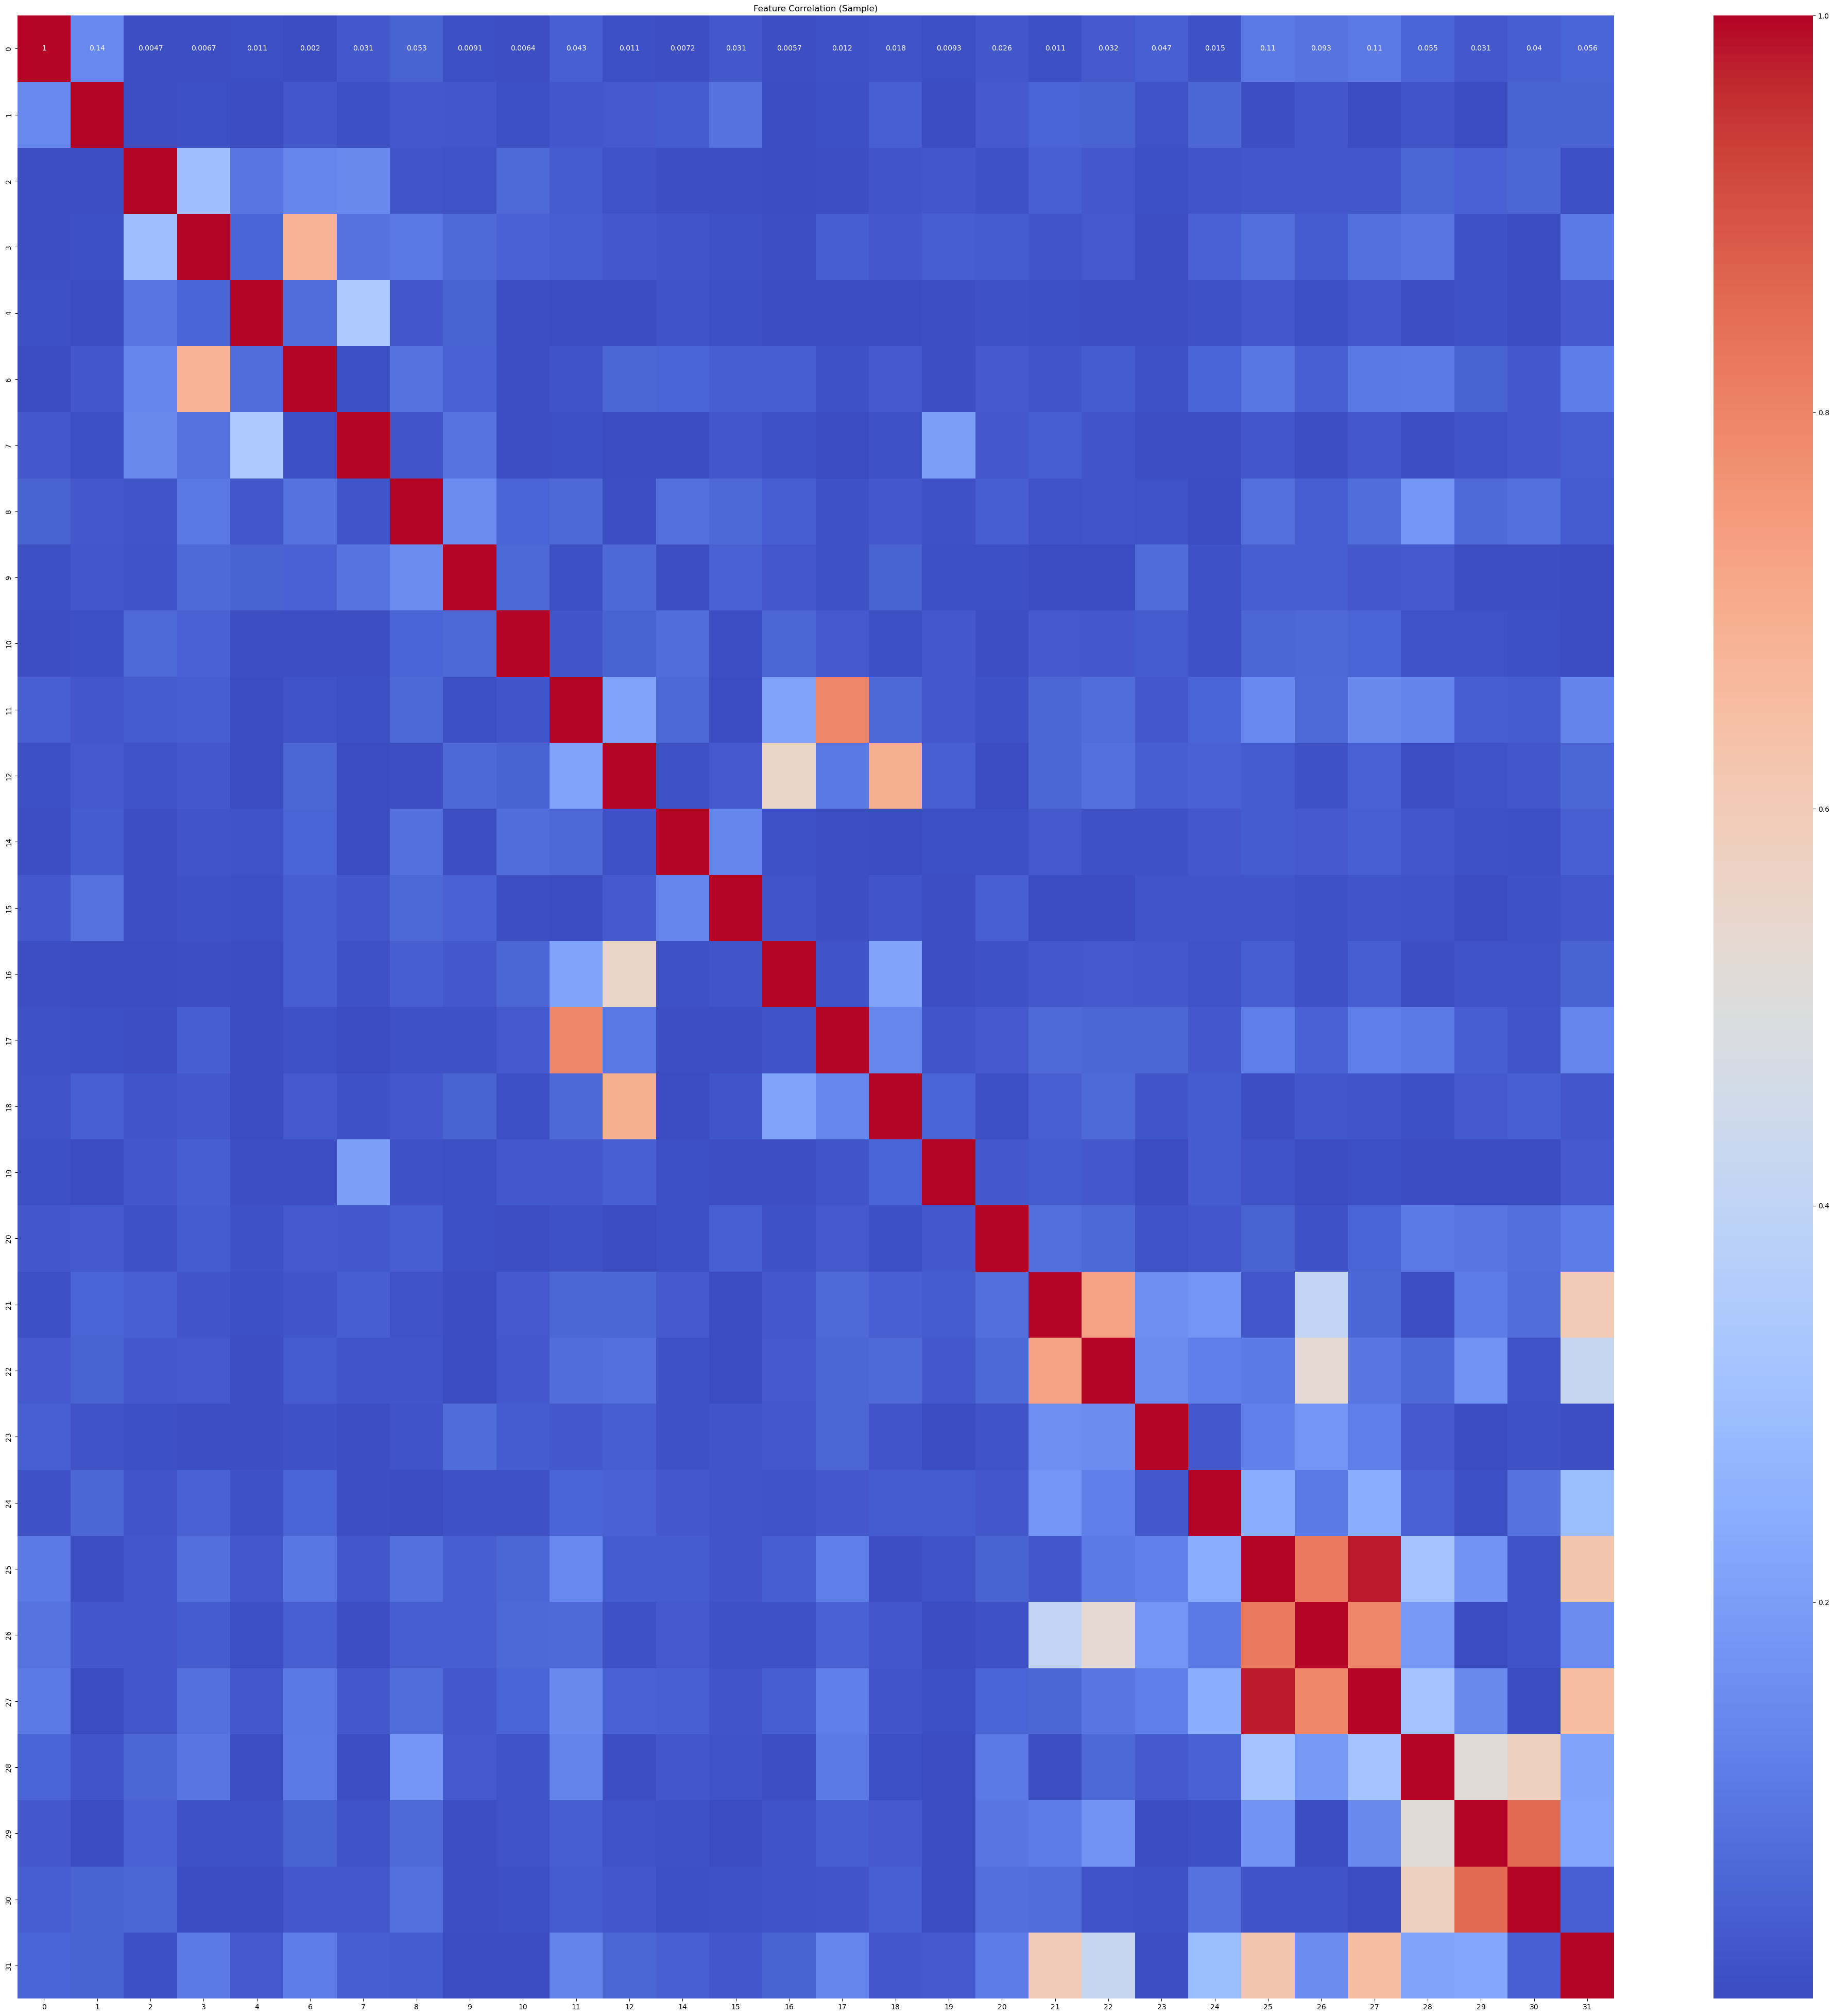

In [32]:
# Bivariate: Correlation heatmap (sample 30 features for clarity)
corr = data_imputed.iloc[:, :-1].corr().abs()
plt.figure(figsize=(50,50))
sns.heatmap(corr.iloc[:30, :30], cmap='coolwarm',annot= True,)
plt.title('Feature Correlation (Sample)')
plt.show()


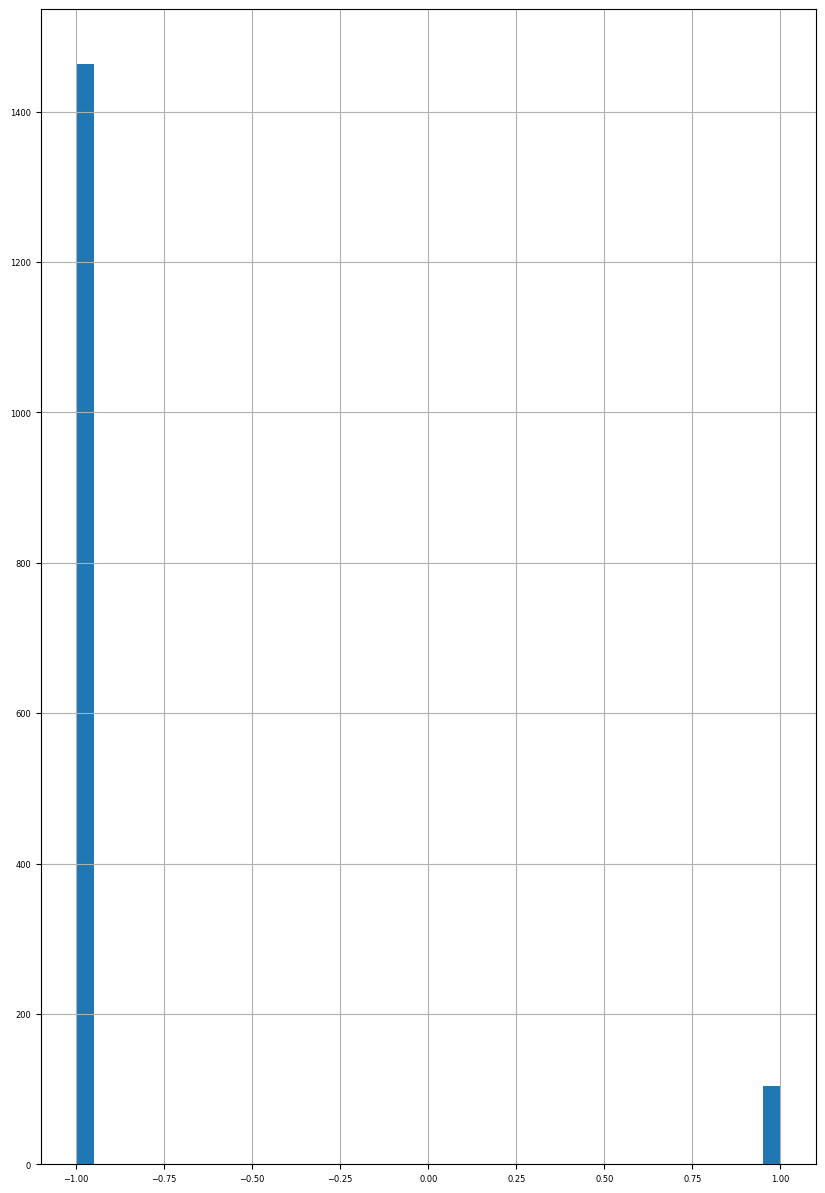

In [33]:
data_imputed['target'].hist(figsize=(10, 15), bins=40, xlabelsize=6, ylabelsize=6);

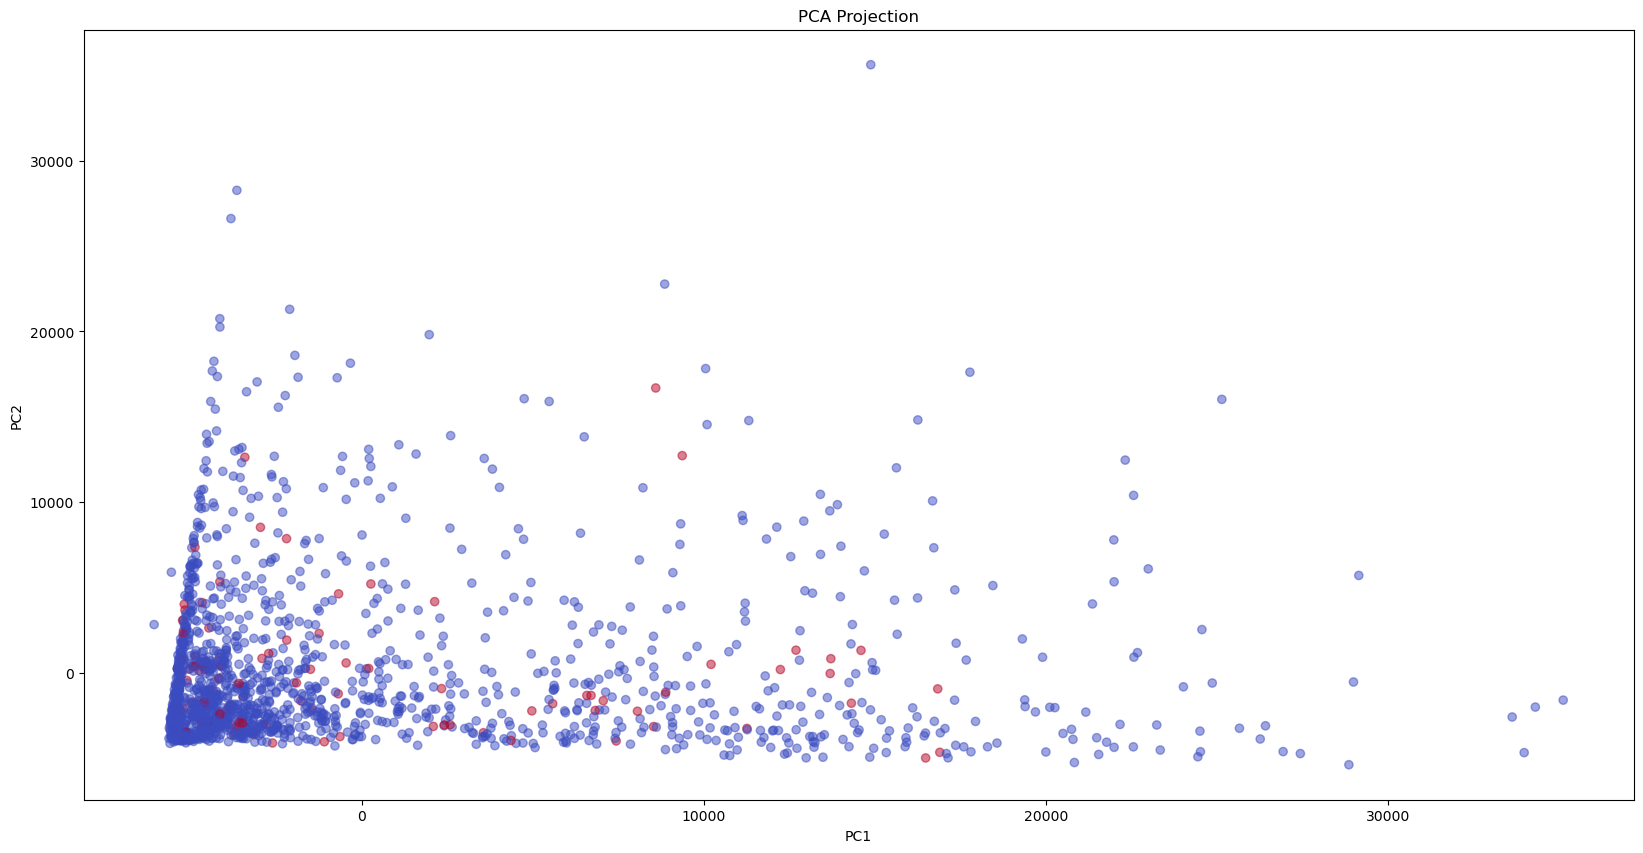

In [34]:
# Multivariate: PCA for visualization
pca = PCA(n_components=2)
plt.figure(figsize=(20,10))
X_pca = pca.fit_transform(data_imputed.drop('target', axis=1))
plt.scatter(X_pca[:,0], X_pca[:,1], c=data_imputed['target'], cmap='coolwarm', alpha=0.5)
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### 4. Data pre-processing:

**• Segregate predictors vs target attributes.**
      
      Segregate Predictors/Target:
        X = features, y = target.

**• Check for target balancing and fix it if found imbalanced (read SMOTE).**
      
      Target Balancing:
        Check for class imbalance; apply SMOTE or similar if needed.

**• Perform train-test split and standardise the data or vice versa if required.**
      
      Train-Test Split:
        Typical split: 70% train, 30% test (stratified).
      Standardization:
        Scale features (StandardScaler/MinMaxScaler).

**• Check if the train and test data have similar statistical characteristics when compared
with original data.**
      
      Distribution Check:
        Compare train/test feature distributions to original data.

In [35]:
# Split predictors and target
X = data_imputed.drop('target', axis=1)
y = data_imputed['target']

In [36]:
# Check for imbalance
print(y.value_counts(normalize=True))

target
-1    0.933631
 1    0.066369
Name: proportion, dtype: float64


In [37]:
# SMOTE for balancing
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


In [38]:
X_bal 

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,3030.930000,2564.000000,2187.733300,1411.126500,1.360200,97.613300,0.124200,1.500500,0.016200,-0.003400,...,1.676500,14.950900,0.500500,0.011800,0.003500,2.363000,0.020500,0.014800,0.004600,71.900500
1,3095.780000,2465.140000,2230.422200,1463.660600,0.829400,102.343300,0.124700,1.496600,-0.000500,-0.014800,...,1.106500,10.900300,0.501900,0.022300,0.005500,4.444700,0.009600,0.020100,0.006000,208.204500
2,2932.610000,2559.940000,2186.411100,1698.017200,1.510200,95.487800,0.124100,1.443600,0.004100,0.001300,...,2.095200,9.272100,0.495800,0.015700,0.003900,3.174500,0.058400,0.048400,0.014800,82.860200
3,2988.720000,2479.900000,2199.033300,909.792600,1.320400,104.236700,0.121700,1.488200,-0.012400,-0.003300,...,1.758500,8.583100,0.499000,0.010300,0.002500,2.054400,0.020200,0.014900,0.004400,73.843200
4,3032.240000,2502.870000,2233.366700,1326.520000,1.533400,100.396700,0.123500,1.503100,-0.003100,-0.007200,...,1.659700,10.969800,0.480000,0.476600,0.104500,99.303200,0.020200,0.014900,0.004400,73.843200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2891.256056,2513.926059,2168.097793,981.775638,1.418195,104.715622,0.123774,1.552411,-0.029905,-0.011063,...,1.650458,9.552002,0.498263,0.010402,0.002876,2.079599,0.010553,0.020961,0.007411,204.500367
2922,2904.405919,2499.924657,2230.846558,1925.486246,1.272222,97.008417,0.122395,1.609197,-0.018568,0.002346,...,1.550257,13.671141,0.496885,0.016614,0.004176,3.341434,0.023137,0.013829,0.003817,60.039545
2923,3008.666837,2419.487801,2200.509551,1330.503990,1.650009,95.673969,0.120969,1.467807,0.000673,-0.001803,...,1.528016,22.465962,0.499748,0.011824,0.002922,2.361368,0.020937,0.017944,0.005378,85.624345
2924,2955.117437,2492.534473,2181.426498,1482.614695,1.257359,107.995805,0.124134,1.423156,0.003047,0.001160,...,1.455159,11.109492,0.498395,0.018172,0.004304,3.652872,0.029382,0.019768,0.007374,69.993524


In [39]:
y_bal

0      -1
1      -1
2       1
3      -1
4      -1
       ..
2921    1
2922    1
2923    1
2924    1
2925    1
Name: target, Length: 2926, dtype: int64

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

In [41]:
X_train 

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
633,3007.850000,2685.060000,2217.866700,1275.091700,1.548700,105.293300,0.123000,1.446400,-0.008100,-0.003700,...,1.345300,9.636100,0.507100,0.014100,0.004000,2.782000,0.021000,0.010700,0.003100,50.791200
867,3006.330000,2424.130000,2189.355600,2363.641200,2.141500,83.423300,0.124600,1.495100,-0.004900,-0.008600,...,1.823200,8.645700,0.502400,0.009600,0.002500,1.902500,0.047300,0.028000,0.008700,59.082500
67,2975.640000,2508.280000,2202.711100,1010.445400,1.003200,104.306700,0.122500,1.507900,-0.008600,0.007000,...,1.925100,21.840700,0.500100,0.011900,0.003300,2.370900,0.013900,0.018700,0.006400,134.201400
2030,3074.364302,2539.146530,2187.221692,1082.466974,1.161596,102.916038,0.121237,1.412004,-0.009285,-0.012797,...,1.436989,13.515736,0.503606,0.023006,0.005122,4.574905,0.027128,0.020924,0.005682,77.733122
1400,3052.980000,2515.510000,2172.811100,969.343600,1.273600,102.736700,0.124300,1.406500,-0.003700,-0.005800,...,1.059700,13.180700,0.508100,0.015800,0.003700,3.110600,0.030200,0.015900,0.005900,52.701400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3014.420000,2440.560000,2224.188900,997.795300,1112.160000,86.164400,0.122400,1.434700,0.000600,0.008400,...,1.059700,13.180700,0.501900,0.018900,0.004500,3.762600,0.014400,0.011000,0.003700,76.078500
1558,3012.300000,2466.840000,2217.411100,1032.283600,1.480200,101.351100,0.119500,1.383200,0.004200,0.002300,...,1.721300,23.405400,0.499300,0.013000,0.003700,2.597600,0.009700,0.017200,0.005400,176.678300
1284,3050.960000,2576.980000,2206.799900,1415.237800,0.977800,97.391100,0.122000,1.454400,0.007100,0.003000,...,1.180500,12.830700,0.503100,0.015800,0.003800,3.132700,0.018400,0.014800,0.005400,80.175900
2321,2943.969649,2549.395132,2204.179465,1606.328540,1.486228,99.380781,0.122252,1.499371,-0.004130,-0.013299,...,76.347230,20.230653,0.500858,0.018063,0.004595,3.600139,0.018995,0.011827,0.003227,60.075707


In [42]:
X_test 

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
713,3096.810000,2476.950000,2205.722200,906.952200,1.344300,105.660000,0.120000,1.433300,0.002200,-0.004500,...,2.017100,14.917700,0.502800,0.023900,0.005000,4.744700,0.007200,0.021000,0.006500,291.804000
672,3094.950000,2505.700000,2201.066700,880.231700,1.414800,106.547800,0.121100,1.527700,-0.023900,0.014900,...,2.506700,41.540100,0.501500,0.031300,0.006100,6.248900,0.010600,0.021200,0.006400,200.181600
1678,2967.758163,2516.007649,2180.082205,1147.161286,1.304236,101.006469,0.121534,1.401562,-0.014106,0.002606,...,1.344944,13.375155,0.499389,0.015500,0.003864,3.099256,0.016388,0.017181,0.005025,109.785647
355,3111.280000,2503.690000,2218.055500,1517.437100,0.857900,105.813300,0.120600,1.585200,-0.007700,0.004800,...,1.398100,11.624900,0.494000,0.012600,0.003200,2.551700,0.048400,0.033900,0.010500,70.061800
705,2965.280000,2482.610000,2205.722200,906.952200,1.344300,105.660000,0.120000,1.521400,-0.003700,-0.005500,...,0.984200,16.423100,0.501400,0.013300,0.003300,2.650000,0.016100,0.035000,0.010500,217.150600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2987.549690,2494.778012,2197.289084,1080.194306,1.342578,103.666515,0.120446,1.490446,-0.005091,-0.001533,...,1.805773,17.663076,0.500982,0.028642,0.005835,5.729121,0.011325,0.020191,0.006575,183.872217
1069,2994.220000,2541.270000,2222.011100,1229.496400,0.764700,105.271100,0.118300,1.424300,0.005900,-0.003400,...,1.018800,22.863600,0.497700,0.015700,0.004500,3.156400,0.045500,0.007200,0.002300,15.732700
1477,3284.820000,2417.920000,2201.288900,1015.437000,2.136600,119.901100,0.125100,1.427900,-0.004700,-0.006800,...,2.387400,15.590500,0.500800,0.014000,0.003400,2.803900,0.005700,0.032800,0.011400,579.181700
2349,3087.708313,2481.824536,2178.883197,1023.370434,1.453698,103.676295,0.122535,1.440268,-0.002640,0.008975,...,45.123072,14.015148,0.499578,0.016698,0.004781,3.332726,0.007532,0.012693,0.004749,168.905551


In [43]:
y_train 

633    -1
867    -1
67     -1
2030    1
1400    1
       ..
1304   -1
1558   -1
1284   -1
2321    1
2452    1
Name: target, Length: 2048, dtype: int64

In [44]:
y_test

713    -1
672    -1
1678    1
355    -1
705    -1
       ..
2435    1
1069   -1
1477   -1
2349    1
840    -1
Name: target, Length: 878, dtype: int64

In [45]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
X_train_scaled

array([[ 0.01758751,  2.65710762,  0.67160254, ..., -0.79705779,
        -0.91868983, -0.58892357],
       [-0.00388075, -1.00206708, -0.3780235 , ...,  1.39353503,
         1.28943318, -0.48521521],
       [-0.43734188,  0.17801781,  0.1136545 , ...,  0.21593311,
         0.38252552,  0.45437905],
       ...,
       [ 0.62646694,  1.14143828,  0.26418222, ..., -0.27789995,
        -0.01178217, -0.22137698],
       [-0.88464935,  0.75459946,  0.16771184, ..., -0.65433205,
        -0.86877356, -0.47279208],
       [ 1.67191876, -0.32457645,  0.32318492, ..., -0.81401515,
        -0.69507188, -0.44582442]])

In [47]:
X_test_scaled

array([[ 1.27404573, -0.26134118,  0.22450708, ...,  0.507168  ,
         0.42195628,  2.42568718],
       [ 1.24777536,  0.14183696,  0.05311649, ...,  0.53249277,
         0.38252552,  1.27966559],
       [-0.54866381,  0.28638717, -0.71942024, ...,  0.02363263,
        -0.15973665,  0.14898452],
       ...,
       [ 3.92947187, -1.08915356,  0.06129671, ...,  2.00132957,
         2.35406392,  6.02023445],
       [ 1.14549481, -0.1929827 , -0.76356131, ..., -0.54475375,
        -0.26850264,  0.88846183],
       [-0.82956136, -0.49833981,  0.16969375, ...,  0.29190743,
         0.22480244,  0.66691158]])

### 5. Model training, testing and tuning:

**• Model training:**
- Pick up a supervised learning model.
- Train the model.
- Use cross validation techniques.
- Apply GridSearch hyper-parameter tuning techniques to get the best accuracy.

**Suggestion:** Use all possible hyper parameter combinations to extract the best accuracies.
- Use any other technique/method which can enhance the model performance.

**Hint:** Dimensionality reduction, attribute removal, standardisation/normalisation,target balancing etc.
- Display and explain the classification report in detail.
- Apply the above steps to atleast 3 different kind of models that you have learnt so far and models that you haven't learned till now (Randomforest, SVM, Naive bayes etc).

**1.Model Selection**
     
     Train at least three supervised classifiers, e.g.:
       a) Random Forest
       b) Support Vector Machine (SVM)
       c) Naive Bayes

**2.Modeling Steps**
    
    a) Baseline Model: Train on all features.
    b) Feature Selection:
         Use techniques like Recursive Feature Elimination (RFE), feature importance from Random Forest, or LASSO to identify key signals.
         Retrain models on selected features and compare results.
    c) Cross-Validation:Use k-fold cross-validation for reliable accuracy estimates.
    d) Hyperparameter Tuning:Apply GridSearchCV for optimal parameters.
    e) Performance Enhancement:Try dimensionality reduction (PCA), target balancing, and further feature engineering.
    f) Evaluation:
         Present classification report: accuracy, precision, recall, F1-score.
         Compare train/test accuracies for all models.

In [48]:
# Use RandomForest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Select top features
selector = SelectFromModel(rf, prefit=True, max_features=50, threshold=-np.inf)
X_train_sel = selector.transform(X_train_scaled)
X_test_sel = selector.transform(X_test_scaled)
print("Selected train features:", X_train_sel.shape[1])
print("Selected test features:", X_test_sel.shape[1])

Selected train features: 50
Selected test features: 50


In [49]:
# ---  Define Hyperparameter Grid for Random Forest ---
# This dictionary specifies the hyperparameters to search over for the RandomForestClassifier.
param_grid_rf = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None], # Maximum depth of the tree (None means full depth)
    'min_samples_split': [2, 5]  # Minimum number of samples required to split an internal node
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train_sel, y_train) # Fit GridSearchCV on the training data
# Get the best estimator (the model with the best hyperparameters found)
rf_best = grid_rf.best_estimator_

# ---  Make Predictions on Training and Test Sets ---
# Predict on the training data to get training performance
y_pred_train_rf = rf_best.predict(X_train_sel)
# Predict on the unseen test data to get generalization performance
y_pred_test_rf = rf_best.predict(X_test_sel)

# Calculate Training Accuracy
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
f1_score_rf = f1_score(y_test, y_pred_test_rf, average='weighted')

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_test_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

          -1       0.96      0.98      0.97       439
           1       0.98      0.96      0.97       439

    accuracy                           0.97       878
   macro avg       0.97      0.97      0.97       878
weighted avg       0.97      0.97      0.97       878



In [50]:
#Support Vector Machine
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='f1',n_jobs=-1)
grid_svm.fit(X_train_sel, y_train)
svm_best = grid_svm.best_estimator_

# ---  Make Predictions on Training and Test Sets ---
# Predict on the training data to get training performance
y_pred_train_svm = svm_best.predict(X_train_sel)
# Predict on the unseen test data to get generalization performance
y_pred_test_svm = svm_best.predict(X_test_sel)

# Calculate Training Accuracy
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
f1_score_svm = f1_score(y_test, y_pred_test_svm, average='weighted')

print("SVM Classification Report:\n", classification_report(y_test, y_pred_test_svm))


SVM Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.97      0.98       439
           1       0.97      1.00      0.98       439

    accuracy                           0.98       878
   macro avg       0.98      0.98      0.98       878
weighted avg       0.98      0.98      0.98       878



In [51]:
#Naive Bayes

nb = GaussianNB()
nb.fit(X_train_sel, y_train)
# ---  Make Predictions on Training and Test Sets ---
# Predict on the training data to get training performance
y_pred_train_nb = nb.predict(X_train_sel)
# Predict on the unseen test data to get generalization performance
y_pred_test_nb = nb.predict(X_test_sel)

# Calculate Training Accuracy
train_accuracy_nb = accuracy_score(y_train, y_pred_train_nb)
test_accuracy_nb = accuracy_score(y_test, y_pred_test_nb)
f1_score_nb = f1_score(y_test, y_pred_test_nb, average='weighted')

print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_test_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

          -1       0.88      0.35      0.50       439
           1       0.59      0.95      0.73       439

    accuracy                           0.65       878
   macro avg       0.74      0.65      0.62       878
weighted avg       0.74      0.65      0.62       878



**• Display and compare all the models designed with their train and test accuracies.**

In [52]:
training_accuracies = [train_accuracy_rf, train_accuracy_svm, train_accuracy_nb]
testing_accuracies = [test_accuracy_rf, test_accuracy_svm, test_accuracy_nb]
cv_accuracies = [f1_score_rf, f1_score_svm, f1_score_nb]
comment = ["Good with many features,robust and interpretable","Good with scaled data and sensitive to scaling, fewer features may help","Fast, may underperform with correlated features"]

table_data = {"Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies,
               "F1-Score": cv_accuracies, "Key comments": comment}
model_names = ["Random Forest","Support Vector Machine", "Naive Bayes"]
pd.set_option('display.max_colwidth',None)

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Training Accuracy,Testing Accuracy,F1-Score,Key comments
Random Forest,1.000000,0.969248,0.969245,"Good with many features,robust and interpretable"
Support Vector Machine,1.000000,0.981777,0.981772,"Good with scaled data and sensitive to scaling, fewer features may help"
Naive Bayes,0.646973,0.650342,0.615296,"Fast, may underperform with correlated features"


**• Select the final best trained model along with your detailed comments for selecting
this model.**
 
 **Model Selection**
    
   1. Choose the model with the best generalization (test accuracy/F1-score) and interpretability.
   2. Save the final model for deployment.

**• Save the selected model for future use**

In [53]:
#Save the Best Model
# Assume Random Forest is best
joblib.dump(rf_best, 'semiconductor_yield_model.pkl')


['semiconductor_yield_model.pkl']

In [54]:
#to view save file
#import joblib

loaded_model = joblib.load('semiconductor_yield_model.pkl')
loaded_model

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

### 6. Conclusion and improvisation:

**• Write your conclusion on the results**

**Conclusion**
1. Feature selection improves interpretability and reduces dimensionality, can enhance model performance by removing noise and irrelevant signals.
2. Random Forest performed best due to its ability to handle high-dimensional data and provide feature importances.
3. SMOTE effectively addressed class imbalance.
4. Not all 591 features are necessary; key signals can be identified through systematic analysis

**Recommendation**
1. Regularly retrain the model with new data and periodically re-evaluate feature importance as the process evolves.

**Improvisation**
1. Explore advanced feature selection, ensemble methods, or deep learning if justified by data size and complexity.
2. Continuous monitoring and retraining as new data becomes available
3. Explore deep learning if more data is available.
4. Incorporate domain knowledge for custom feature engineering.